In [6]:
import pandas as pd

survivals_train = pd.read_csv('./datasets/train.csv')

In [18]:
survivals_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


succesfully loaded training data about titanic survival-rate 

train and test set are already seperated for us, time to visualize!

In [19]:
survivals_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [20]:
survivals_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
survivals_train['Cabin'].value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
F33            3
C22 C26        3
              ..
D37            1
D10 D12        1
B19            1
B41            1
C103           1
Name: Cabin, Length: 147, dtype: int64

too many objects to encode, might be useful information if I had a map to assign values per place, same with Ticket number; ticket number is most probably useless information, In addition to this we are missing around 150 age datapoints, age might be a useful feature so it might be best to take a median

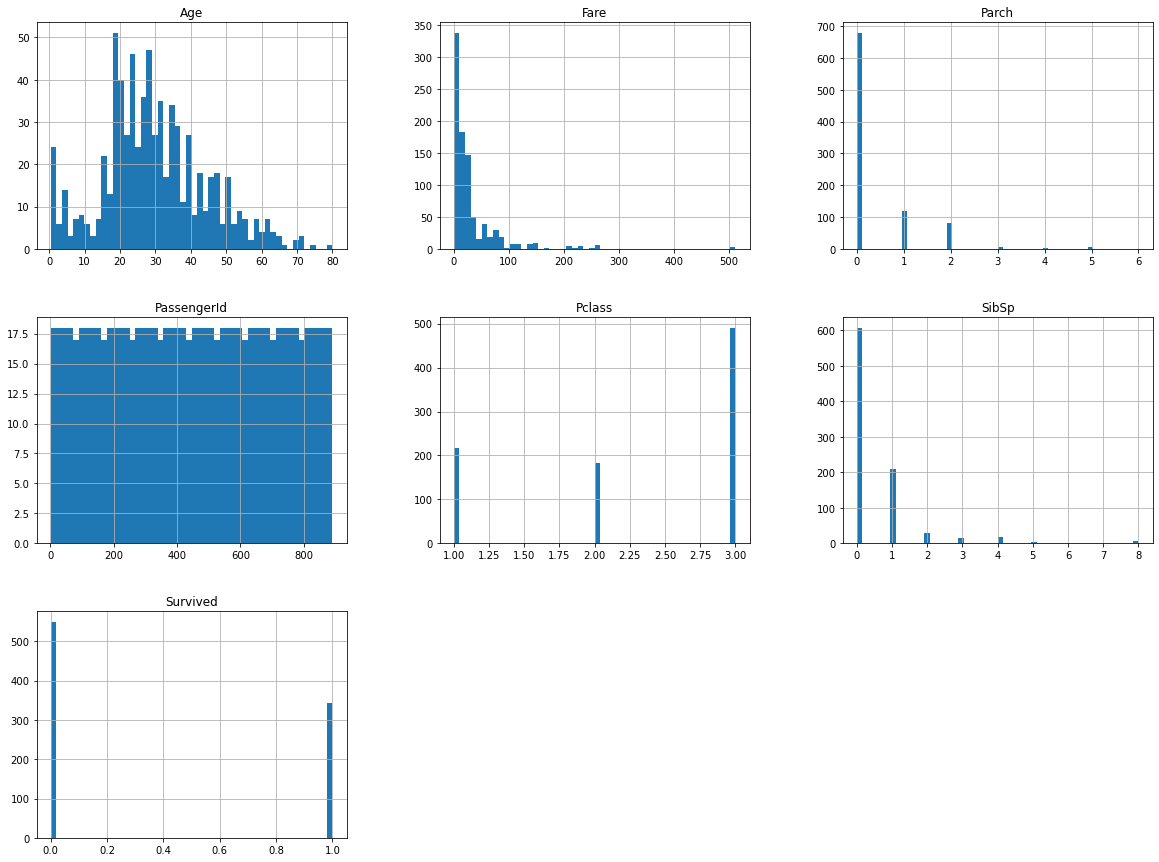

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
survivals_train.hist(bins=50, figsize=(20,15))
plt.show()

In [27]:
corr_matrix = survivals_train.corr()

In [29]:
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

This was very insightful, very important is the Fare, based on correlation, the more someone paid, the higher chance they had for survival. On the other hand, the higher class # (1st 2nd, 3rd) the more likely you were to perish. 

If you had parents or children, you were a little bit more likely to survive.

The older you were, the higher chance of dying.

others are neglidgable

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x107DFAF0>,
      dtype=object)

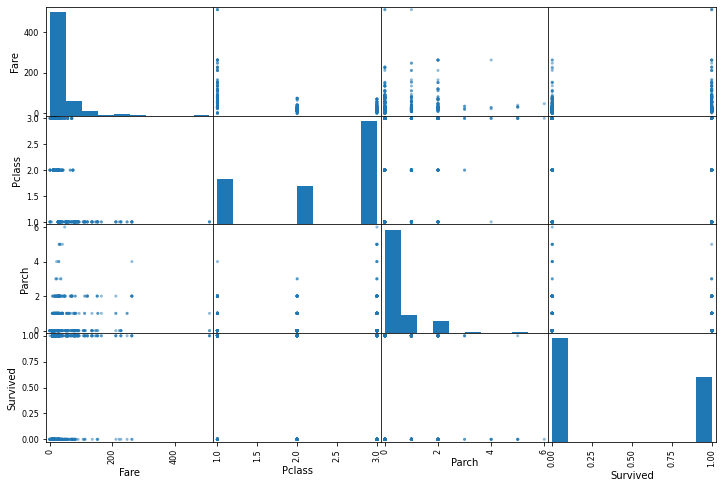

In [32]:
from pandas.plotting import scatter_matrix

attributes = ["Fare", "Pclass", "Parch", "Survived"]
scatter_matrix(survivals_train[attributes], figsize=(12, 8))

Graphs are not the most insightful to the eye because must of the data is clustered around a single point we can use logistic regression to predict this binary value

In [41]:
survival_cat = survivals_train[['Sex']]
survival_cat[:10]

,Sex
0,male
1,female
2,female
3,female
4,male
5,male
6,male
7,male
8,female
9,female


In [45]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
survival_cat_encoded = ordinal_encoder.fit_transform(survival_cat)
survival_cat_encoded[:10]

array([[1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.]])

In [49]:
ordinal_encoder.categories_
type(survival_cat_encoded)

numpy.ndarray

In [72]:
survival = survivals_train.copy()

In [73]:
type(survival)

pandas.core.frame.DataFrame

In [74]:
survival['nSex'] = survival_cat_encoded

In [75]:
survival.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,nSex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0


In [76]:
survival = survival.drop("Sex", axis=1)

In [78]:
corr_matrix = survival.corr()

In [79]:
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
nSex          -0.543351
Name: Survived, dtype: float64

In [84]:
survival_num = survival.drop(['Name', 'Ticket', 'Cabin','Embarked'], axis=1)
survival_num.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,nSex
0,1,0,3,22.0,1,0,7.2500,1.0
1,2,1,1,38.0,1,0,71.2833,0.0
2,3,1,3,26.0,0,0,7.9250,0.0
3,4,1,1,35.0,1,0,53.1000,0.0
4,5,0,3,35.0,0,0,8.0500,1.0


In [85]:
survival_num.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,nSex
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [86]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

imputer.fit(survival_num)

imputer.statistics_

array([446.    ,   0.    ,   3.    ,  28.    ,   0.    ,   0.    ,
        14.4542,   1.    ])

In [87]:
X = imputer.transform(survival_num)

In [89]:
survival_tr = pd.DataFrame(X, columns=survival_num.columns, index=survival_num.index)

In [91]:
survival_tr.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,nSex
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.647587
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.477990
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [146]:
survival_label = survivals_train['Survived'].copy()

In [125]:
survival_features = survivals_train.drop(['Survived'], axis=1)

In [126]:
survival_features

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [127]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

In [128]:
survivals_numer = survivals_train.drop(['Survived', 'PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [129]:
survivalsnumertr = num_pipeline.fit_transform(survivals_numer)

In [130]:
survivalsnumertr

array([[ 0.82737724, -0.56573646,  0.43279337, -0.47367361, -0.50244517],
       [-1.56610693,  0.66386103,  0.43279337, -0.47367361,  0.78684529],
       [ 0.82737724, -0.25833709, -0.4745452 , -0.47367361, -0.48885426],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337,  2.00893337, -0.17626324],
       [-1.56610693, -0.25833709, -0.4745452 , -0.47367361, -0.04438104],
       [ 0.82737724,  0.20276197, -0.4745452 , -0.47367361, -0.49237783]])

In [131]:
survivals_numer

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500
...,...,...,...,...,...
886,2,27.0,0,0,13.0000
887,1,19.0,0,0,30.0000
888,3,NaN,1,2,23.4500
889,1,26.0,0,0,30.0000


In [132]:
from sklearn.compose import ColumnTransformer

num_attribs = ["Pclass","Age","SibSp","Parch","Fare"]
cat_attribs = ['Sex']

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OrdinalEncoder(), cat_attribs)
])

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [137]:
survival_prepared = full_pipeline.fit_transform(survivals_train)

In [138]:
survival_prepared

array([[ 0.82737724, -0.56573646,  0.43279337, -0.47367361, -0.50244517,
         1.        ],
       [-1.56610693,  0.66386103,  0.43279337, -0.47367361,  0.78684529,
         0.        ],
       [ 0.82737724, -0.25833709, -0.4745452 , -0.47367361, -0.48885426,
         0.        ],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337,  2.00893337, -0.17626324,
         0.        ],
       [-1.56610693, -0.25833709, -0.4745452 , -0.47367361, -0.04438104,
         1.        ],
       [ 0.82737724,  0.20276197, -0.4745452 , -0.47367361, -0.49237783,
         1.        ]])

In [149]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(survival_prepared, survival_label)

LogisticRegression()

In [163]:
some_data = survivals_train.iloc[:20]
some_labels = survival_label.iloc[:20]

In [164]:
some_data_prepared = full_pipeline.transform(some_data)

In [168]:
survival_train_predictions = log_reg.predict(some_data_prepared)
print("PREDICTIONS: ", survival_train_predictions)

PREDICTIONS:  [0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1]


In [169]:
print("LABELS: ", list(some_labels))

LABELS:  [0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1]


In [172]:
full_train_data_prepared = full_pipeline.transform(survivals_train)
full_train_labels_list = list(survival_label)

survival_train_predictions = log_reg.predict(full_train_data_prepared)


In [183]:
from sklearn.metrics import confusion_matrix, accuracy_score

cnf_matrix = confusion_matrix(full_train_labels_list, survival_train_predictions)
acc_score = accuracy_score(full_train_labels_list, survival_train_predictions)

print(cnf_matrix)
print("acccuracy: ", acc_score)

[[466  83]
 [ 99 243]]
acccuracy:  0.7957351290684624


The model appears to be fairly accurate when predicting against the whole training set, A better option would be to cross validate the training set to make sure we are not overfitting the data

In [189]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LogisticRegression(), full_train_data_prepared, full_train_labels_list,
                        scoring='accuracy', cv=5)

In [191]:
def display_scores(scores):
    print(scores)
    print("MEAN: ", scores.mean())
    print("STD: ", scores.std())
    
display_scores(scores)

[0.7877095  0.7752809  0.78089888 0.75842697 0.82022472]
MEAN:  0.7845081915761722
STD:  0.020319050642552603


The model appears to have an accuracy rate of 78.5% ±2.03%. This shows that we are not overfitting the model so logistic regression is the correct algorithm to choose. I will save this model and then continue on to fine-tuning. 

In [192]:
import joblib

joblib.dump(log_reg, 'survival_logistic_regression.pkl')

['survival_logistic_regression.pkl']

In [193]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5,
                          scoring='accuracy',
                          return_train_score=True)

grid_search.fit(full_train_data_prepared, full_train_labels_list)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='accuracy')

In [194]:
grid_search.best_params_

{'C': 1}

In [195]:
grid_search.best_estimator_

LogisticRegression(C=1)

In [199]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(mean_score, params)

0.6229113050028247 {'C': 0.001}
0.7351892536563932 {'C': 0.01}
0.7834348126294646 {'C': 0.1}
0.7845081915761722 {'C': 1}
0.7833845960705543 {'C': 10}
0.7833845960705543 {'C': 100}
0.7833845960705543 {'C': 1000}


Time to load the testing data!

In [221]:
import pandas as pd

titanic_test = pd.read_csv('./datasets/test.csv')

In [222]:
prepared_titanic_test = full_pipeline.fit_transform(titanic_test)

In [223]:
predicted_survivals = log_reg.predict(prepared_titanic_test)

In [224]:
final_titanic_data = titanic_test[["PassengerId"]]

In [225]:
final_titanic_data = pd.DataFrame.from_dict(final_titanic_data)

In [226]:
final_titanic_data

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [228]:
final_titanic_data["Survived"] = predicted_survivals

In [229]:
final_titanic_data

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [230]:
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [231]:
predicted_survivals

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [232]:
final_titanic_data.to_csv('submission.csv', index=False)